<p><img alt="Colaboratory logo" height="140px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" align="left" hspace="10px" ></p>

<h1><b>Tarea 1: Distribuciones y TLC <b></h1>

---
<div align="right">
<font size=3>
Estiven Castrillón Alzate<br>
Institute of Physics<br>
</font>
</div>

Esta actividad tiene como objetivo aplicar los conceptos básicos estadísticos aprendidos hasta ahora para el análisis de problemas, y comprender las implicaciones del teorema del límite central y del tamaño de la muestra estadística en el contexto experimental.

- El notebook estará dividido en dos partes, la primera para el diámetro de las canicas y todos los puntos relacionados; la segunda para el conteo del detector Geiger y todos los puntos relacionados.

**Nota principal:** La estadísitica utilizada para graficar los histogramas es 'density' de seaborn (Seaborn.histplot — Seaborn 0.12.2 documentation, s. f.), la cual normaliza de forma que el **área** total del histograma sea igual a 1.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import integrate, special
from warnings import filterwarnings

filterwarnings("ignore")

# Diámetro de canicas

In [20]:
# data_canicas = pd.read_excel('laboratory_data_geiger_detector_marbles_diameters.xlsx', sheet_name='diametros_canicas')
data_canicas_json = '{"diametro(mm)":{"0":15.82,"1":15.7,"2":16.31,"3":16.37,"4":15.19,"5":15.77,"6":16.05,"7":15.59,"8":15.61,"9":15.47,"10":15.82,"11":15.43,"12":16.51,"13":15.67,"14":15.64}}'
data_canicas = pd.read_json(data_canicas_json).sort_index()
print(f'Tamaño de los datos: {data_canicas.shape}')
data_canicas.head(2)

Tamaño de los datos: (15, 1)


,diametro(mm)
0,15.82
1,15.70


1. Graficar el conjunto de medidas de diámetros de canicas que su grupo tomó (un histograma) y analizar la distribución de los datos. ¿Tiene la forma de una distribución Gaussiana? ¿Son suficientes datos para dar alguna conclusión? Reporte las variables de tendencia central (x̄, s).

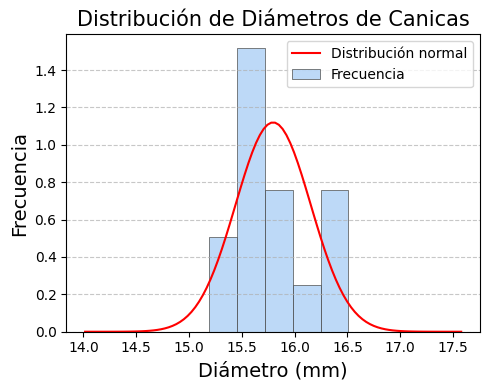

In [37]:
# Histograma
plt.figure(figsize=(5, 4))
sns.histplot(data_canicas,
         alpha=0.7,
         stat='density',
         label='Diámetro canicas',
         color='blue',
         palette="pastel",
         edgecolor=".3",
         linewidth=.5)

# Definición de la función de distribución normal
def distribucion_normal(x, mu, sigma):
    normal = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    return normal

# Definiendo parámetros para la función de probabilidad normal
mu, std = float(np.mean(data_canicas)), float(np.std(data_canicas))
x = np.linspace(mu - 5*std, mu + 5*std, 100)
result = distribucion_normal(x, mu, std)

# Gráfico de líneas para la función de densidad de probabilidad normal
plt.plot(x, 
         result, 
         color='r', 
         label='Distribución normal')

# Títulos, etiquetas y parámetros
plt.title('Distribución de Diámetros de Canicas', fontsize=15)
plt.xlabel('Diámetro (mm)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.grid(axis='y', linestyle='--' ,alpha=0.7)
plt.legend(['Distribución normal', 'Frecuencia'])
plt.tight_layout()

plt.show()

- **Respuesta 1:** La distribución de los datos puede ser normal por la forma que exhibe el hitograma, aun así no hay suficientes datos para comprobar exactamente esto e identificar completamente la distribución normal. Más aún, el ajuste de la función de probabilidad Gaussiana nos indica que los valores de diámetro todavía están muy lejos de la distribución esperada.

In [22]:
print(f'---Variables de tendencia central---\n\
(μ) media = {round(mu, 2)}, (σ) desviación estándar = {round(std, 2)}')

---Variables de tendencia central---
(μ) media = 15.8, (σ) desviación estándar = 0.36


2. Repita el proceso del ítem anterior, pero usando la totalidad de los datos disponibles en la tabla de Excel.

In [23]:
# Importación de datos desde archivos
# datos_totales_canicas = pd.read_excel('laboratory_data_geiger_detector_marbles_diameters.xlsx',
#                                       sheet_name='datos_totales_canicas',
#                                       dtype='float')

# Importación de datos desde archivo json extraido del archivo excel
datos_totales_canicas_json = '{"diametro_canicas":{"0":16.43,"1":16.37,"2":16.46,"3":15.58,"4":16.53,"5":16.28,"6":15.6,"7":15.84,"8":16.47,"9":15.53,"10":15.65,"11":16.3,"12":16.0,"13":15.55,"14":16.26,"15":16.46,"16":15.82,"17":15.97,"18":15.86,"19":16.04,"20":16.19,"21":16.47,"22":15.6,"23":16.18,"24":16.7,"25":16.49,"26":15.85,"27":15.43,"28":15.75,"29":15.43,"30":15.63,"31":15.73,"32":15.7,"33":15.91,"34":16.52,"35":15.94,"36":15.63,"37":15.83,"38":15.26,"39":15.67,"40":15.77,"41":15.85,"42":15.24,"43":15.18,"44":15.84,"45":15.82,"46":15.76,"47":15.78,"48":15.7,"49":16.03,"50":15.53,"51":16.11,"52":15.34,"53":15.65,"54":15.74,"55":16.04,"56":15.83,"57":16.31,"58":15.79,"59":15.97,"60":15.54,"61":15.55,"62":15.65,"63":15.76,"64":15.93,"65":16.27,"66":16.35,"67":16.4,"68":16.5,"69":16.78,"70":16.16,"71":16.3,"72":15.93,"73":15.99,"74":16.37,"75":15.72,"76":15.39,"77":16.09,"78":15.66,"79":16.2,"80":16.27,"81":16.15,"82":16.91,"83":16.7,"84":16.91,"85":15.6,"86":16.27,"87":15.67,"88":16.66,"89":15.52,"90":16.32,"91":15.71,"92":16.53,"93":16.12,"94":15.44,"95":15.95,"96":15.73,"97":15.93,"98":16.23,"99":15.81,"100":15.95,"101":16.29,"102":15.65,"103":15.76,"104":15.63,"105":16.1,"106":16.16,"107":16.18,"108":16.52,"109":16.09,"110":15.67,"111":16.24,"112":16.28,"113":16.2,"114":16.13,"115":15.72,"116":15.71,"117":15.72,"118":15.73,"119":15.74,"120":15.83,"121":15.67,"122":15.87,"123":15.91,"124":15.81,"125":15.79,"126":15.83,"127":15.78,"128":16.62,"129":15.95,"130":15.48,"131":16.32,"132":15.69,"133":15.81,"134":15.47,"135":15.39,"136":15.47,"137":15.55,"138":15.27,"139":14.87,"140":15.64,"141":15.14,"142":15.99,"143":16.02,"144":15.7,"145":16.02,"146":16.18,"147":15.11,"148":15.7,"149":16.05,"150":15.82,"151":15.7,"152":16.31,"153":16.37,"154":15.19,"155":15.77,"156":16.05,"157":15.59,"158":15.61,"159":15.47,"160":16.07,"161":15.74,"162":16.14,"163":15.55,"164":15.65,"165":16.23,"166":16.01,"167":15.78,"168":15.53,"169":16.1,"170":15.97,"171":15.8,"172":15.5,"173":15.92,"174":16.06,"175":16.21,"176":16.0,"177":15.95,"178":16.32,"179":15.7,"180":15.8,"181":15.9,"182":15.85,"183":16.11,"184":15.75,"185":16.2,"186":16.03,"187":15.71,"188":16.42,"189":15.61,"190":15.77,"191":15.83,"192":15.94,"193":15.95,"194":16.04,"195":16.06,"196":15.89,"197":16.28,"198":16.42,"199":15.65,"200":15.8,"201":16.16,"202":15.05,"203":15.55,"204":15.18,"205":15.88,"206":15.95,"207":16.42,"208":15.9,"209":15.54,"210":15.26,"211":15.65,"212":15.99,"213":15.06,"214":15.78,"215":15.57,"216":15.06,"217":15.9,"218":15.81,"219":15.47,"220":16.5,"221":16.37,"222":15.7,"223":16.1,"224":15.93,"225":16.13,"226":16.44,"227":16.24,"228":15.85,"229":16.74,"230":15.91,"231":16.0,"232":15.7,"233":14.01,"234":15.75,"235":16.25,"236":16.48,"237":16.21,"238":15.98,"239":16.01,"240":15.55,"241":16.19,"242":15.73,"243":15.91,"244":15.93,"245":16.29,"246":15.43,"247":15.27,"248":15.48,"249":15.36}}'
datos_totales_canicas = pd.read_json(datos_totales_canicas_json).sort_index()
print(f'Tamaño de los datos: {datos_totales_canicas.shape}')
datos_totales_canicas.head(2)

Tamaño de los datos: (250, 1)


,diametro_canicas
0,16.43
1,16.37


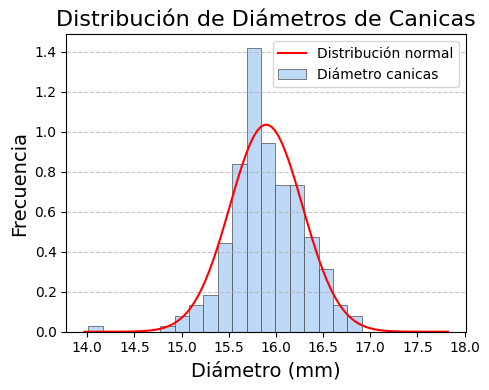

In [38]:
# Histograma
plt.figure(figsize=(5, 4))
sns.histplot(datos_totales_canicas,
         alpha=0.7,
         stat='density',
         label='Diámetro canicas',
         color='blue',
         palette="pastel",
         edgecolor=".3",
         linewidth=.5)

# Definiendo parámetros para la función de probabilidad normal
mu, sigma = float(np.mean(datos_totales_canicas)), float(np.std(datos_totales_canicas))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
result = distribucion_normal(x, mu, sigma)

# Gráfico de líneas para la función de densidad de probabilidad normal
plt.plot(x,
         result,
         color='r',
         label='Distribución normal')

# Títulos, etiquetas y parámetros
plt.title('Distribución de Diámetros de Canicas', fontsize=16)
plt.xlabel('Diámetro (mm)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.grid(axis='y', linestyle='--' ,alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

- **Respuesta 2**: Con la totalidad de los datos puestos en la tabla de Excel, ahora si la distribución es claramente normal, adicionalmente la curva de función de propabilidad Gaussiana, calculada con base en la media y desviación estándar del conjunto de datos, se ajusta de manera satisfactoria a la distribución expuesta en el histograma.

In [25]:
print(f'---Variables de tendencia central---\n\
(μ) media = {round(mu, 2)}0, (σ) desviación estándar = {round(sigma, 2)}')

---Variables de tendencia central---
(μ) media = 15.90, (σ) desviación estándar = 0.39


3. Aplique el teorema de límite central analizando la distribución de los valores medios de subconjuntos de datos de diferentes tamaños (cada vez más grandes). Discuta el comportamiento de las medidas de tendencia central (μ, σ).

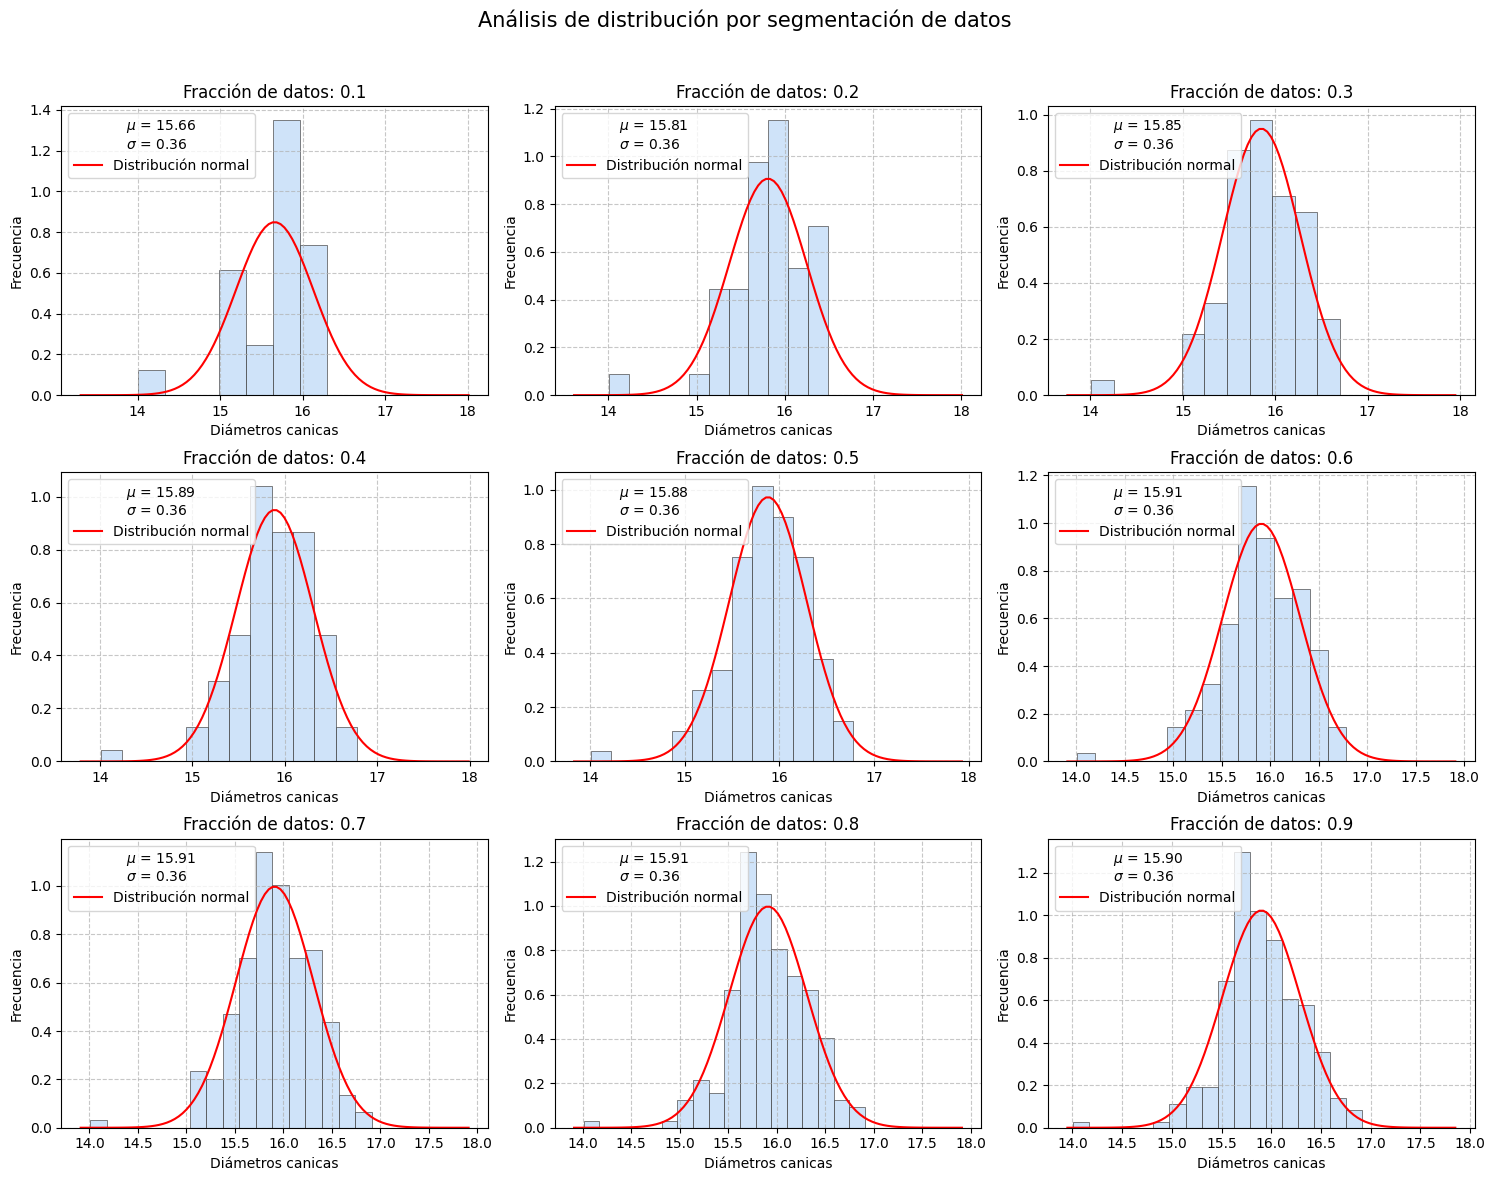

In [26]:
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fracciones_muestras = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Fracciones de los datos que se utilizarán

# Definiendo un ciclo para graficar cada distribución de cada fracción de datos
for i, fraccion in enumerate(fracciones_muestras):
    row = i // num_cols
    col = i % num_cols

    # Tomando las muestras de datos
    fraccion_de_datos = datos_totales_canicas.sample(frac=fraccion, random_state=73)
    # Parámetros para la función normal y
    mu = float(round(np.mean(fraccion_de_datos), 2))
    sigma = float(round(np.std(fraccion_de_datos), 2))

    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    result = distribucion_normal(x, mu, sigma)

    ax = axes[row, col]
    # Histograma
    sns.histplot(fraccion_de_datos,
            stat='density',
            alpha=0.5,
            color='blue',
            palette="pastel",
            edgecolor=".3",
            linewidth=.5,
            ax=ax)
    # Gráfico de líneas densidad de probabilidad normal
    ax.plot(x, 
            result, 
            color='r', 
            label='Distribución normal')
    
    ax.set_xlabel('Diámetros canicas')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Fracción de datos: {fraccion}')
    ax.legend()
    ax.grid(linestyle='--', alpha=0.7)

    # Mostrar media y desviación estándar
    legend_text = f'$\mu$ = {mu :.2f} \n$\sigma $ = {std :.2f}'
    ax.legend(loc='upper left', title=legend_text)

fig.suptitle('Análisis de distribución por segmentación de datos', fontsize=15)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

- Las distribuciones mostradas en los histogramas reflejan una clara distribución normal cuando se tiene la totalidad de datos, sin embargo, incluso tomando muestras de menor tamaño, la distribución se sigue notando, solo que en menor medida.

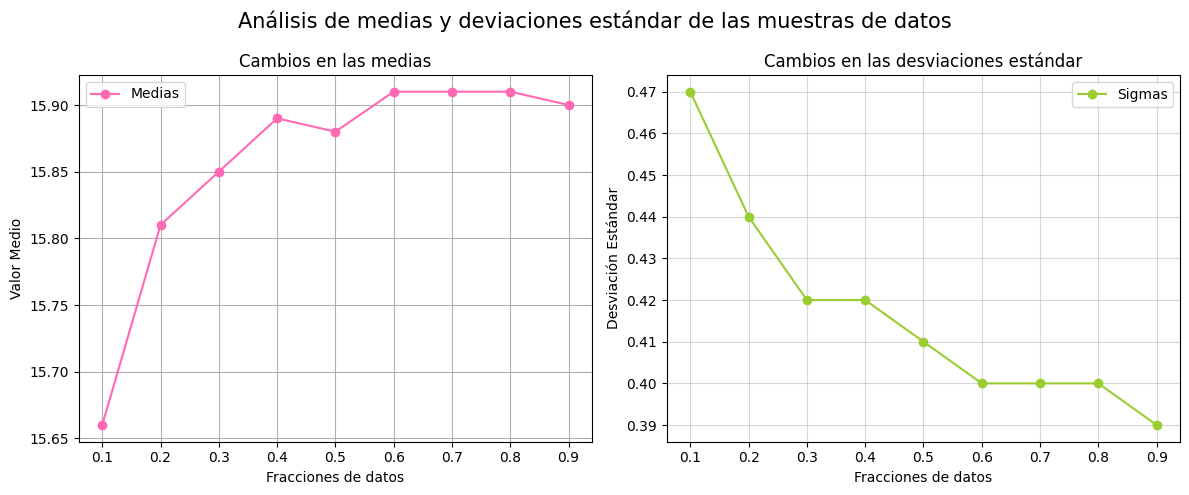

In [27]:
medias, sigmas = [], []

# Cálculo de desviaciones estándar y medias de las muestras
for fraccion in fracciones_muestras:
    fraccion_de_datos = datos_totales_canicas.sample(frac=fraccion, random_state=73)
    numero_datos = len(datos_totales_canicas)
    mu = float(round(np.mean(fraccion_de_datos), 2))
    sigma = float(round(np.std(fraccion_de_datos), 2))

    medias.append(mu)
    sigmas.append(sigma)

# Dataframe con las fracciones de datos, medias y desviaciones estándar correspondientes
medidas_distribuciones = pd.DataFrame(list(zip(fracciones_muestras ,medias, sigmas)),
             columns=['fracciones', 'medias', 'sigmas'])
medidas_distribuciones

# Gráficas del cambio de las desviaciones estándar y las medias de las muestras de datos
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de las medias
axs[0].plot(medidas_distribuciones['fracciones'],
            medidas_distribuciones['medias'],
            marker='o',
            color='hotpink',
            label='Medias')

axs[0].set_title('Cambios en las medias')
axs[0].set_xlabel('Fracciones de datos')
axs[0].set_ylabel('Valor Medio')
axs[0].grid()
axs[0].legend()

# Gráfico de las desviaciones estándar
axs[1].plot(medidas_distribuciones['fracciones'],
            medidas_distribuciones['sigmas'],
            marker='o',
            color='yellowgreen',
            label='Sigmas')

axs[1].set_title('Cambios en las desviaciones estándar')
axs[1].set_xlabel('Fracciones de datos')
axs[1].set_ylabel('Desviación Estándar')
axs[1].grid(alpha=0.5)
axs[1].legend()

fig.tight_layout()
fig.suptitle('Análisis de medias y deviaciones estándar de las muestras de datos', fontsize=15)
fig.subplots_adjust(top=0.85)

plt.show()

- **Respuesta 2:** El comportamiento de la desviación estándar en las muestras aleatorias tomadas tiene una tendencia de decrecimiento respoecto a las fracciones de datos tomas en cada muestra, mientas que las medias o promedios fue creciente.

- Ambos valores tienden a aproximarse a un valor específico, en el caso de las medias, cercano a 15.9; en el caso de las desviaciones estándar, un valor cercano a 0.39.

Aplicando el Teorema del Límite Central: 

Según el T.C.M, la media de los datos totales es igual al promedio de las medias de las muestras y la desviación estándar es $$\sigma = \frac{S}{\sqrt{N}}$$ Donde $S$ es la desviación estándar de las medias de las muestras y $N$ es el número total de datos totales

In [28]:
# Aplicando el Teorema del Límite Central
media_tcm = np.mean(medidas_distribuciones['medias'])
sigma_tcm = np.std(medidas_distribuciones['medias'] / np.sqrt(len(datos_totales_canicas)))
mu_totales, sigma_totales = np.mean(datos_totales_canicas['diametro_canicas']), np.std(datos_totales_canicas['diametro_canicas'])

# Comparación entre las medias y desviaciones estándar obtenidas contra los predichos por el T.C.M
print(f'---Variables de tendencia central---\n\
(μ) media T.C.M = {round(media_tcm, 3)}, (σ) desviación estándar T.C.M = {round(sigma_tcm, 3)}\n\
(μ) media total = {round(mu_totales, 3)}, (σ) desviación estándar total = {round(sigma, 3)}0')

---Variables de tendencia central---
(μ) media T.C.M = 15.858, (σ) desviación estándar T.C.M = 0.005
(μ) media total = 15.897, (σ) desviación estándar total = 0.390


**Conclusión T.C.M:** La media calculada con el Teorema del Límite Central es muy similar a la media de los datos totales de diámetros de canicas, pero la desviación estándar no lo es, esto puede ser debido a errores sistemáticos en las mediciones.

4. Calcular la probabilidad de que el diámetro de una canica esté entre 14.52 mm y 16.35 mm.

In [29]:
# Integrando la función normal_distribucion() desde 14.52 hasta 16.35
limite_inferior = 14.52
limite_superior = 16.35
integral_definida, _ = integrate.quad(distribucion_normal, limite_inferior, limite_superior, args=(mu, sigma))
print(f'Probabilidad de que el diámetro esté entre 14.52 mm y 16.35 mm: {round(integral_definida, 4) * 100}%')

Probabilidad de que el diámetro esté entre 14.52 mm y 16.35 mm: 87.55%


In [30]:
# Integrando la función normal_distribucion() desde 17.00 mm hasta infinito
limite_inferior = 17.00
limite_superior = np.inf
integral_definida, _ = integrate.quad(distribucion_normal, limite_inferior, limite_superior, args=(mu, sigma))
print(f'Probabilidad de que el diámetro esté entre 17.00 mm e infinito: {round(integral_definida, 4) * 100}%')

Probabilidad de que el diámetro esté entre 17.00 mm e infinito: 0.24%


6. ¿Cuál es la probabilidad de que al medir otra canica su diámetro sea menor a 14.23 mm?

In [31]:
# Integrando la función normal_distribucion() desde -infinito hasta 14.23 mm
limite_inferior = -np.inf
limite_superior = 14.23
integral_definida, _ = integrate.quad(distribucion_normal, limite_inferior, limite_superior, args=(mu, sigma))
print(f'Probabilidad de que el diámetro sea menor a 14.23 mm: {round(integral_definida * 100, 4)}%')

Probabilidad de que el diámetro sea menor a 14.23 mm: 0.0009%


# Detector Geiger

In [32]:
# datos_geiger = pd.read_excel('laboratory_data_geiger_detector_marbles_diameters.xlsx',
#                      sheet_name='datos_totales_geiger',
#                      dtype='int')
datos_geiger_json = '{"particulas_geiger":{"0":6,"1":2,"2":6,"3":3,"4":4,"5":4,"6":2,"7":4,"8":3,"9":9,"10":5,"11":3,"12":3,"13":0,"14":4,"15":2,"16":5,"17":4,"18":3,"19":2,"20":2,"21":2,"22":3,"23":2,"24":5,"25":3,"26":4,"27":2,"28":3,"29":1,"30":6,"31":5,"32":2,"33":4,"34":4,"35":1,"36":6,"37":1,"38":6,"39":5,"40":4,"41":2,"42":4,"43":4,"44":4,"45":3,"46":3,"47":2,"48":4,"49":2,"50":1,"51":2,"52":2,"53":3,"54":2,"55":4,"56":2,"57":3,"58":3,"59":0,"60":3,"61":4,"62":3,"63":4,"64":3,"65":1,"66":2,"67":0,"68":4,"69":4,"70":3,"71":2,"72":2,"73":3,"74":3,"75":4,"76":2,"77":6,"78":3,"79":2,"80":4,"81":3,"82":2,"83":2,"84":1,"85":3,"86":3,"87":5,"88":3,"89":5,"90":2,"91":7,"92":1,"93":4,"94":3,"95":1,"96":5,"97":1,"98":2,"99":4,"100":2,"101":4,"102":3,"103":6,"104":1,"105":4,"106":4,"107":2,"108":4,"109":3,"110":2,"111":4,"112":2,"113":3,"114":2,"115":1,"116":2,"117":3,"118":5,"119":2,"120":4,"121":3,"122":3,"123":4,"124":4,"125":4,"126":3,"127":7,"128":3,"129":1,"130":7,"131":1,"132":2,"133":4,"134":3,"135":3,"136":6,"137":4,"138":1,"139":4,"140":4,"141":2,"142":2,"143":2,"144":4,"145":5,"146":3,"147":2,"148":4,"149":1,"150":3,"151":6,"152":4,"153":7,"154":6,"155":3,"156":3,"157":3,"158":2,"159":1,"160":1,"161":1,"162":9,"163":2,"164":3,"165":3,"166":6,"167":2,"168":3,"169":1,"170":5,"171":0,"172":0,"173":3,"174":2,"175":3,"176":0,"177":0,"178":2,"179":3,"180":2,"181":3,"182":1,"183":4,"184":0,"185":3,"186":4,"187":0,"188":4,"189":2,"190":1,"191":2,"192":1,"193":5,"194":1,"195":1,"196":3,"197":2,"198":3,"199":1,"200":4,"201":5,"202":2,"203":4,"204":1,"205":1,"206":3,"207":1,"208":4,"209":0,"210":5,"211":2,"212":1,"213":1,"214":1,"215":0,"216":3,"217":0,"218":6,"219":3,"220":3,"221":1,"222":5,"223":4,"224":4,"225":1,"226":3,"227":2,"228":4,"229":5,"230":2,"231":0,"232":2,"233":3,"234":4,"235":3,"236":1,"237":5,"238":2,"239":4,"240":1,"241":7,"242":2,"243":3,"244":1,"245":8,"246":2,"247":6,"248":4,"249":1,"250":6,"251":3,"252":3,"253":6,"254":2,"255":4,"256":3,"257":4,"258":3,"259":5,"260":3,"261":1,"262":2,"263":4,"264":1,"265":1,"266":3,"267":1,"268":4,"269":0,"270":5,"271":2,"272":1,"273":1,"274":1,"275":0,"276":3,"277":0,"278":6,"279":3,"280":3,"281":1,"282":3,"283":2,"284":2,"285":2,"286":1,"287":3,"288":4,"289":6,"290":6,"291":2,"292":2,"293":0,"294":2,"295":3,"296":2,"297":5,"298":3,"299":4,"300":0,"301":6}}'
datos_geiger = pd.read_json(datos_geiger_json).sort_index()

print(f'Tamaño de los datos: {datos_geiger.shape}')
datos_geiger.head(3)

Tamaño de los datos: (302, 1)


,particulas_geiger
0,6
1,2
2,6


7. Graficar la totalidad de los datos de conteo que se encuentran en la tabla de Excel correspondiente a los eventos registrados en intervalos de 10 s. ¿Visualmente, el fenómeno se predice con una distribución de Poisson? Reporte la media de su distribución (x̄) y su desviación estándar (s).

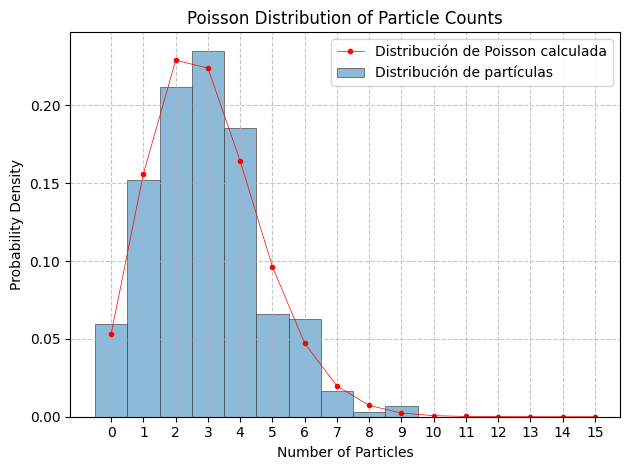

In [33]:
# Histograma de la distribución del conteo de partículas
sns.histplot(datos_geiger['particulas_geiger'],
             alpha=0.5,
             label='Distribución de partículas',
             palette="pastel",
             edgecolor=".3",
             linewidth=.5,
             discrete=True,
             stat='density')

# Definiendo la función de densidad de probabilidad Poisson
def distribucion_poisson(x, mu):
    funcion_poisson = (mu ** x * np.exp(-mu)) / (special.factorial(x))
    return funcion_poisson

# Parámetros para la función
mu = float(np.mean(datos_geiger['particulas_geiger']))
std = float(np.sqrt(mu))
x = np.arange(0, 16, 1)
valores_poisson = distribucion_poisson(x, mu)

# Gráfico de líneas densidad de probabilidad Poisson
plt.plot(x,
         valores_poisson,
         marker='.',
         linestyle='-',
         color='red',
         label='Distribución de Poisson calculada',
         linewidth=0.5)

plt.xlabel('Number of Particles')
plt.ylabel('Probability Density')
plt.title('Poisson Distribution of Particle Counts')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 16))
plt.tight_layout()
plt.show()

In [34]:
print(f'---Variables de tendencia central---\n\
(μ) media = {round(mu, 2)}, (σ) desviación estándar = {round(std, 2)}')

---Variables de tendencia central---
(μ) media = 2.93, (σ) desviación estándar = 1.71


8. De acuerdo con el resultado anterior, y suponiendo que el fenómeno se puede modelar con una distribución de Poisson ¿Cuál es la probabilidad de que en
un intervalo de 10 s se produzcan 3 eventos de detección? ¿Cuál es la probabilidad de que en el mismo intervalo no se detecte ninguna partícula?

In [35]:
probabilidad_3 = distribucion_poisson(3, mu) * 100
probabilidad_0 = distribucion_poisson(0, mu) * 100
print(f'La probabilidad de que se produzcan 3 eventos de detección: {round(probabilidad_3, 2)}%')
print(f'La probabilidad de que se produzcan 0 eventos de detección: {round(probabilidad_0, 2)}%')

La probabilidad de que se produzcan 3 eventos de detección: 22.39%
La probabilidad de que se produzcan 0 eventos de detección: 5.32%


9. Usando el número de cuentas que obtuvo para el intervalo de 1 000 s **a)** ¿Cuál sería el promedio esperado y la incertidumbre para el número de detecciones en dicho intervalo? A partir de esté dato se puede deducir cual sería el promedio de las detecciones de eventos (R) en un intervalo menor. **b)** ¿Cuál sería para el caso de un intervalo de 10s? ¿concuerda con lo que obtuvo en el numeral 7?

**Respuesta a)** El promedio esperado denotado por lambda ($\lambda$) es $\lambda \pm \sqrt{\lambda}$ donde $\lambda$ es el número de cuentas de partículas en el intervalo.

Es decir, para nuestro caso: $\lambda = 295$. Luego su incertidumbre está dada por $\sqrt{\lambda} = \sqrt{295} = 17.18$

Finalmente, promedio esperado y la incertidumbre para el número de detecciones en un intervalo de 1000 segundos es de: $(295 \pm 17)\text{detecciones}$

**Respuesta b)** Para el caso de 10 segundos, la siguiente formula es de ayuda $R = \lambda \times \frac{\text{Nuevo tiempo del intervalo}}{\text{Intervalo medido}}
$, reemplazando valores $R = 295 \times \frac{10}{1000}$

Finalmente, $R = 2.95$ detecciones en 10 segundos,  lo cual concuerda con el valor de la media calculada de los datos que es de $\mu = 2.93$ detecciones.

10. Con los datos del numeral 9 para el intervalo de 1 000 s determine la probabilidad de que en 10 medidas de 10 s nunca se detecten 5 partículas.

In [36]:
media_1000s = 2.95
probabilidad_no_5 = (1 - distribucion_poisson(5, media_1000s)) * 100
print(f'La probabilidad de que nunca se produzcan 5 eventos de detección es de: {round(probabilidad_no_5, 2)}%')

La probabilidad de que nunca se produzcan 5 eventos de detección es de: 90.26%


# Bibliografía

- Seaborn.histplot — Seaborn 0.12.2 documentation. (s. f.). https://seaborn.pydata.org/generated/seaborn.histplot.html